# SP via class imbalance

Example [test scores](https://www.brookings.edu/blog/social-mobility-memos/2015/07/29/when-average-isnt-good-enough-simpsons-paradox-in-education-and-earnings/)

SImpson's paradox can also occur due to a class imbalance, where for example, over time the value of several differnt subgroups all increase, but the totla average decreases over tme.   This is also am mportant tpe to catch because this can inicate a large class disparity beased on the subgrouping variable.  

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from mlsim import sp_plot
import seaborn as sns

For pay, we can actually have the count of some positions decline 

In [390]:
t = np.linspace(0,50,11)
count_rate = np.asarray([-2.5,-3,5.5,-10])
count_pow = np.asarray([1.1,1.0,1.15,.8])
count_0 = np.asarray([775,650,350,500])
count = np.asarray([count_0 + count_rate*(t_i**count_pow) for t_i in t])
share = count/np.asarray([np.sum(count, axis=1)]*4).T
score_rate = np.asarray([.10, .085, .025,.075])
score_0 = [21,26,47,34]
scores_group = np.asarray([score_0 - score_rate*t_i for t_i in t])
total_score = np.sum(scores_group*share,axis=1)


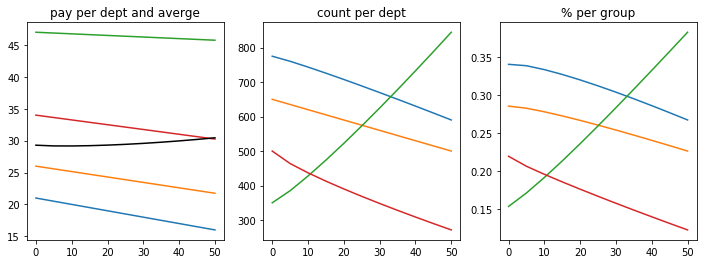

In [391]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(t,scores_group,)
plt.plot(t,total_score,'k', label ='average')
plt.title('pay per dept and averge');

plt.subplot(1,3,2)
plt.plot(t,count)
plt.title('count per dept');

plt.subplot(1,3,3)
plt.plot(t,share)
plt.title('% per group');

In [392]:
total_score

array([29.28571429, 29.17350336, 29.16587572, 29.21149108, 29.29827565,
       29.42002702, 29.57278265, 29.75369013, 29.96053306, 30.19149586,
       30.44503348])

The above is occuring in aggregate data, we should generate and aim to detect from the individual measurements. So we can expand the above generator.  We'll use the group score and counts to draw the indivdual rows of our table. 

In [393]:
roles = [ 'Support',  'Sales','Management', 'R&D',]

shareM = [.28,.55,.625,.75]

In [394]:
100/360

0.2777777777777778

In [395]:
dat = [[t_t,np.round(np.random.normal(loc=sg,scale=.75),decimals=2),g,np.random.choice(['M','F'],p=[p_m,1-p_m]) ]
            for sg_t, c_t,t_t in zip(scores_group,count,t) # per time 
           for sg,c,g,p_m in zip(sg_t,c_t,roles,shareM) 
           for i in range(int(c))] # per person per group

In [396]:
scores_group

array([[21.   , 26.   , 47.   , 34.   ],
       [20.5  , 25.575, 46.875, 33.625],
       [20.   , 25.15 , 46.75 , 33.25 ],
       [19.5  , 24.725, 46.625, 32.875],
       [19.   , 24.3  , 46.5  , 32.5  ],
       [18.5  , 23.875, 46.375, 32.125],
       [18.   , 23.45 , 46.25 , 31.75 ],
       [17.5  , 23.025, 46.125, 31.375],
       [17.   , 22.6  , 46.   , 31.   ],
       [16.5  , 22.175, 45.875, 30.625],
       [16.   , 21.75 , 45.75 , 30.25 ]])

In [397]:
len(dat)

24380

In [398]:
df = pd.DataFrame(data=dat,columns = ['year','pay','department','gender'])

In [399]:
df.head()

,year,pay,department,gender
0,0.0,21.31,Support,F
1,0.0,21.99,Support,M
2,0.0,20.65,Support,F
3,0.0,21.43,Support,F
4,0.0,20.71,Support,M


In [400]:
raise_amt = {'F':2, 'M':0}
def g_raise(row):
    return row['pay'] + raise_amt[row['gender']]

df['pay'] = df.apply(g_raise,axis=1)

/home/smb/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


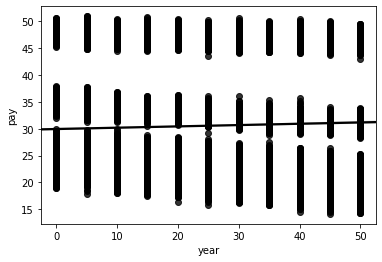

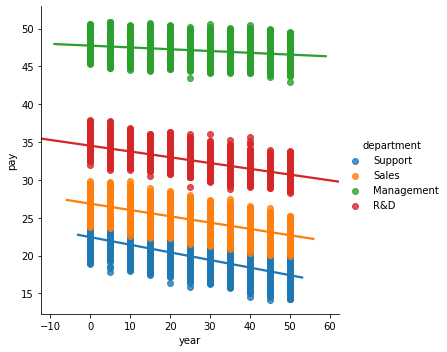

In [401]:
sns.regplot('year','pay',data=df,color='k')
sns.lmplot('year','pay',data =df,hue='department')


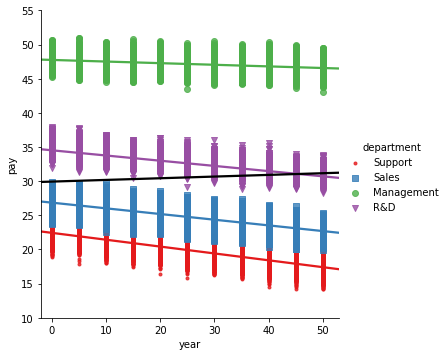

In [402]:
sp_plot(df,'year','pay','department',domain_range=[-2,53,10,55])

In [403]:
rank_total = df.groupby(['gender']).aggregate({'pay':['mean','count']})
rank_total

pay       
             mean  count
gender                  
F       28.890622  11744
M       32.090450  12636

In [404]:
rank_summary = df.groupby(['gender','department'])['pay'].mean().unstack()
# sns.barplot(y='pay',data = rank_summary)
rank_summary['Overall'] = rank_total
rank_summary.apply(np.round, decimals = 2).T
# rank_summary.T

ValueError: Wrong number of items passed 2, placement implies 1

In [405]:
rank_summary = df.groupby(['gender','department']).aggregate({'pay':['mean','count']})
# sns.barplot(y='pay',data = rank_summary)
# rank_summary['Overall'] = rank_total
# sel_round = {float:lambda x: np.round(x,decimals=2),
#           int: lambda x: x}
# float_round = lambda x: sel_round[type(x)](x)
# rank_summary.apply(float_round).T
rank_summary.reset_index()


gender  department        pay      
                           mean count
0      F  Management  48.288659  2460
1      F         R&D  34.391561  1006
2      F       Sales  25.942818  2842
3      F     Support  20.635388  5436
4      M  Management  46.285380  3935
5      M         R&D  32.339421  3107
6      M       Sales  24.020835  3483
7      M     Support  18.578304  2111

/home/smb/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


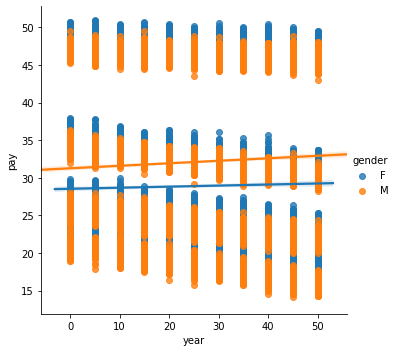

In [406]:
sns.lmplot('year','pay',data =df,hue='gender')

In [329]:
df.groupby(['department','gender'])['pay'].mean().unstack()

gender,F,M
department,,
Management,48.556523,46.553078
R&D,34.336920,32.351358
Sales,26.014072,23.966461
Support,20.651543,18.603919


In [330]:
df.groupby(['gender'])['pay'].mean()

gender
F    28.700754
M    32.373012
Name: pay, dtype: float64

In [331]:
df.groupby(['year','gender','department'])['pay'].mean().unstack()

department   Management        R&D      Sales    Support
year gender                                             
0.0  F        48.996638  35.987059  28.003529  23.023159
     M        46.963632  34.012730  26.041136  21.074796
5.0  F        48.936242  35.682982  27.643214  22.582176
     M        46.946398  33.621547  25.546330  20.436029
10.0 F        48.911736  35.247396  27.150732  22.021492
     M        46.795406  33.252235  25.155856  19.999278
15.0 F        48.730000  34.842569  26.770895  21.506777
     M        46.785633  32.870924  24.706724  19.547746
20.0 F        48.640588  34.375882  26.296667  20.961962
     M        46.739164  32.493368  24.227245  18.944385
25.0 F        48.598578  34.147848  25.901604  20.530223
     M        46.600249  32.119619  23.871303  18.499487
30.0 F        48.637087  33.825900  25.425918  20.015782
     M        46.547919  31.678710  23.399397  17.895137
35.0 F        48.471748  33.397701  24.968008  19.486608
     M        46.461273  31.450290  23.058478  17.515959
40.0 F        48.393110  33.020423  24.634000  19.013072
     M        46.400126  31.044726  22.598525  16.983392
45.0 F        48.269088  32.717206  24.194701  18.473107
     M        46.272599  30.632986  22.130498  16.419011
50.0 F        48.283658  32.205294  23.815733  17.968947
     M        46.265733  30.181281  21.784218  15.983856

In [311]:
df['year'] = df['year'].astype(int,copy=False)


In [332]:
df.head()

,year,pay,department,gender
0,0.0,22.63,Support,F
1,0.0,24.74,Support,F
2,0.0,21.16,Support,M
3,0.0,21.11,Support,M
4,0.0,19.39,Support,M


In [335]:
df = df[['pay','year','department','gender']]

In [336]:
df.to_csv('../../detect_simpsons_paradox_dev/data/wages_rank_gender_regression_time2.csv',index=False)

In [318]:
%%bash
cd ../../detect_simpsons_paradox_dev/data
pwd

/home/smb/Documents/code/detect_simpsons_paradox_dev/data


In [49]:
df.groupby(['department','month']).mean().unstack()

pay                                              \
month               0.0        5.0        10.0       15.0       20.0   
department                                                             
ManagementR&D  45.173344  45.074567  44.499601  44.500758  44.344276   
Sales          28.059270  27.421685  27.402915  27.371211  26.296015   
Support        23.242909  22.646718  22.313690  21.838369  21.246061   

                                                                      \
month               25.0       30.0       35.0       40.0       45.0   
department                                                             
ManagementR&D  43.838858  44.172213  44.441187  44.480484  43.960588   
Sales          26.020328  25.669617  25.250975  24.886577  24.722890   
Support        21.001765  21.063636  20.285992  19.704145  19.294303   

                          
month               50.0  
department                
ManagementR&D  43.721245  
Sales          24.304871  
Support        19.116026

In [85]:
df.groupby(['year']).mean().T

year,0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
score,295.704,294.59806,293.677208,292.375835,291.766763,290.98496,290.108084,290.526284,289.936276,289.764436,290.450742


The overall goes down while each of the groupwise means goes up, as expected.  

In [86]:
df.groupby('race').corr()

score      year
race                          
B    score  1.000000  0.275269
     year   0.275269  1.000000
H    score  1.000000  0.564539
     year   0.564539  1.000000
W    score  1.000000  0.311376
     year   0.311376  1.000000

In [87]:
df.corr()

,year,score
year,1.00000,-0.07852
score,-0.07852,1.00000


We can see this in the correlation matrices as well, so our existing detector will work, but it has an intuitively different generating mechanism.

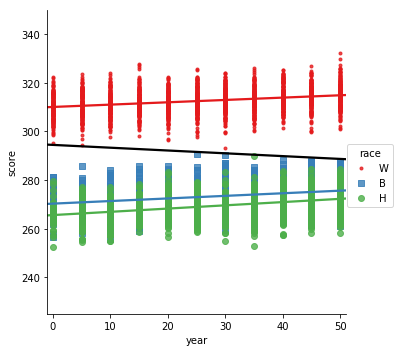

In [42]:
sp_plot(df,'year','score','race',domain_range=[-1, 51, 225, 350])

Vizually, the scatter plots for this are also somewhat different, the groups are not as separable as they were in the regression-based examples we worked with initially.  

# Generalizing this 

instead of setting a growth rate and being completely computational, we can set the start and end and then add noise in the middle

In [25]:
# set this final value
score_t = (score_0*score_growth*N_t).T
total_t = .85*total_0
count_t = total_t*np.linalg.pinv(score_t)


count = np.linspace(count_0,count_t,N_t)
share = count/np.asarray([np.sum(count, axis=1)]*3).T
scores_group = np.asarray([score_0 + score_rate*t_i for t_i in t])
total_score = np.sum(scores_group*share,axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t,scores_group)
plt.plot(t,total_score,'k', label ='average')
plt.title('score per group and averge');

plt.subplot(1,2,2)
plt.plot(t,count)
plt.title('count per group');

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [48]:
N_t = 11
t = np.linspace(0,50,N_t)
group_names = ['W','B','H']
`

count_0 = np.asarray([200,60,40])
count_0

share_0 = count_0/np.asarray([np.sum(count_0)]*3).T
score_0 = np.asarray([310,270,265])
score_growth = [1.1,1.3,1.4]
total_0 = np.sum(share_0*score_0)
total_0

SyntaxError: invalid syntax (<ipython-input-48-b946432f3fc2>, line 4)